In [214]:
%matplotlib inline

from nltk.corpus import wordnet as wn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
from annotation_utils import get_synset_first
from collections import defaultdict
from nltk.corpus import wordnet as wn
from collections import Counter,defaultdict
import itertools

In [2]:
ss = wn.synset('dog.n.01')

In [4]:
[len(p) for p in ss.hypernym_paths()]

[14, 9]

In [5]:
ss.hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('animal.n.01'),
  Synset('chordate.n.01'),
  Synset('vertebrate.n.01'),
  Synset('mammal.n.01'),
  Synset('placental.n.01'),
  Synset('carnivore.n.01'),
  Synset('canine.n.02'),
  Synset('dog.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('animal.n.01'),
  Synset('domestic_animal.n.01'),
  Synset('dog.n.01')]]

In [29]:
[len(p) for syn in wn.synsets('thing') for p in syn.hypernym_paths() if syn.pos() == "n"]

[6, 7, 9, 6, 6, 11, 6, 2, 4, 8, 6, 3]

In [30]:
[len(p) for syn in wn.synsets('person') for p in syn.hypernym_paths() if syn.pos() == "n"]

[4, 7, 8, 7]

In [31]:
[len(p) for syn in wn.synsets('guy') for p in syn.hypernym_paths() if syn.pos() == "n"]

[7, 10, 7, 10, 9, 10, 11]

In [32]:
[p for syn in wn.synsets('guy') for p in syn.hypernym_paths() if syn.pos() == "n"]

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('causal_agent.n.01'),
  Synset('person.n.01'),
  Synset('adult.n.01'),
  Synset('man.n.01'),
  Synset('guy.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('person.n.01'),
  Synset('adult.n.01'),
  Synset('man.n.01'),
  Synset('guy.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('causal_agent.n.01'),
  Synset('person.n.01'),
  Synset('male.n.02'),
  Synset('man.n.01'),
  Synset('guy.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('person.n.01'),
  Synset('male.n.02'),
  Synset('man.n.01'),
  Synset('guy.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Syns

In [20]:
wn.synsets('guy')

[Synset('guy.n.01'),
 Synset('guy.n.02'),
 Synset('guy.n.03'),
 Synset('ridicule.v.01'),
 Synset('guy.v.02')]

In [22]:
ss = wn.synset('guy.n.01')

In [25]:
ss.pos()

'n'

In [43]:
with open("../data/refcoco_refexp.txt.json", 'r') as f:
    reftxt = json.load(f)
parsedf = pd.DataFrame(reftxt["sentences"])

In [44]:
parsedf.head(50)

,basicDependencies,enhancedDependencies,enhancedPlusPlusDependencies,index,line,parse,tokens
0,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",0,1,(ROOT\n (NP\n (NP (DT the) (NN lady))\n ...,"[{'index': 1, 'word': 'the', 'originalText': '..."
1,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",1,2,(ROOT\n (FRAG\n (NP (NN lady))\n (PP (I...,"[{'index': 1, 'word': 'lady', 'originalText': ..."
2,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",2,3,(ROOT\n (NP (JJ blue) (NN shirt))),"[{'index': 1, 'word': 'blue', 'originalText': ..."
3,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",3,4,(ROOT\n (FRAG\n (NP (NN woman))\n (PP (...,"[{'index': 1, 'word': 'woman', 'originalText':..."
4,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",4,5,(ROOT\n (NP\n (NP (NN woman))\n (NP (JJ...,"[{'index': 1, 'word': 'woman', 'originalText':..."
5,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",5,6,(ROOT\n (NP\n (NP (NN woman))\n (NP (NN...,"[{'index': 1, 'word': 'woman', 'originalText':..."
6,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",6,7,(ROOT\n (NP\n (NP (NN person))\n (NP (N...,"[{'index': 1, 'word': 'person', 'originalText'..."
7,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",7,8,(ROOT\n (NP (NN standing))),"[{'index': 1, 'word': 'standing', 'originalTex..."
8,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",8,9,(ROOT\n (FRAG\n (ADJP (JJ middle))\n (S...,"[{'index': 1, 'word': 'middle', 'originalText'..."
9,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",9,10,(ROOT\n (FRAG\n (NP (NN lady))\n (S\n ...,"[{'index': 1, 'word': 'lady', 'originalText': ..."


In [45]:
parsedf['heads'] = parsedf.basicDependencies.apply(lambda x:x[0]['dependentGloss'])

In [220]:
def find_nominal_head(dfrow):
    
    stop = ['left','right','top','bottom','corner','side','front','center','middle']
    dep_root = dfrow['basicDependencies'][0]
    assert dep_root['dep'] == 'ROOT'
    
    nouns_index = [t['index'] for t in dfrow['tokens'] if t['pos'].startswith('NN') and t['word'] not in stop ]
    nouns_word = [t['word'] for t in dfrow['tokens'] if t['pos'].startswith('NN') and t['word'] not in stop]

    if dep_root['dependent'] in nouns_index:
        return dep_root['dependentGloss']
    elif len(nouns_word) > 0:
        return nouns_word[0]
    return "<NONE>"

In [221]:
parsedf['nominal_head'] = [find_nominal_head(row) for ix,row in parsedf.iterrows()]

In [222]:
parsedf.head(20)

,basicDependencies,enhancedDependencies,enhancedPlusPlusDependencies,index,line,parse,tokens,heads,nominal_head
0,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",0,1,(ROOT\n (NP\n (NP (DT the) (NN lady))\n ...,"[{'index': 1, 'word': 'the', 'originalText': '...",lady,lady
1,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",1,2,(ROOT\n (FRAG\n (NP (NN lady))\n (PP (I...,"[{'index': 1, 'word': 'lady', 'originalText': ...",lady,lady
2,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",2,3,(ROOT\n (NP (JJ blue) (NN shirt))),"[{'index': 1, 'word': 'blue', 'originalText': ...",shirt,shirt
3,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",3,4,(ROOT\n (FRAG\n (NP (NN woman))\n (PP (...,"[{'index': 1, 'word': 'woman', 'originalText':...",woman,woman
4,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",4,5,(ROOT\n (NP\n (NP (NN woman))\n (NP (JJ...,"[{'index': 1, 'word': 'woman', 'originalText':...",woman,woman
5,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",5,6,(ROOT\n (NP\n (NP (NN woman))\n (NP (NN...,"[{'index': 1, 'word': 'woman', 'originalText':...",woman,woman
6,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",6,7,(ROOT\n (NP\n (NP (NN person))\n (NP (N...,"[{'index': 1, 'word': 'person', 'originalText'...",person,person
7,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",7,8,(ROOT\n (NP (NN standing))),"[{'index': 1, 'word': 'standing', 'originalTex...",standing,standing
8,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",8,9,(ROOT\n (FRAG\n (ADJP (JJ middle))\n (S...,"[{'index': 1, 'word': 'middle', 'originalText'...",<NONE>,<NONE>
9,"[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...","[{'dep': 'ROOT', 'governor': 0, 'governorGloss...",9,10,(ROOT\n (FRAG\n (NP (NN lady))\n (S\n ...,"[{'index': 1, 'word': 'lady', 'originalText': ...",lady,lady


In [223]:
names0 = Counter(list(parsedf['nominal_head']))

In [224]:
len(names0)

4975

In [225]:
names1 = {n:names0[n] for n in names if len(wn.synsets(n)) > 0}

In [226]:
len(names1)

2529

In [227]:
sum(names1.values())

130523

In [228]:
sum(names0.values())

142210

In [229]:
def min_wn_spec(word):
    p = [len(p) for syn in wn.synsets(word) for p in syn.hypernym_paths() if syn.pos() == "n"]
    if len(p) > 0:
        return min(p)
    return -1

In [230]:
name2spec = {n:min_wn_spec(n) for n in names0}

In [231]:
spec2names = {}

In [232]:
levels = set(name2spec.values())

In [233]:
levels

{-1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

In [234]:
for l in levels:
    spec2names[l] = Counter({n:names0[n] for n in name2spec if name2spec[n] == l})

In [235]:
spec2names[10].most_common(5)


[('elephant', 2441),
 ('couch', 1053),
 ('truck', 760),
 ('vase', 681),
 ('suitcase', 562)]

In [236]:
speclist = []
total = sum(names1.values())
for l in sorted(spec2names.keys()):
    #if l == -1:
    #    continue
    relf = sum(spec2names[l].values())/total
    speclist.append((l,relf,",".join([p[0] for p in spec2names[l].most_common(5)])))

In [237]:
specdf = pd.DataFrame(speclist,columns=['specificity','rel.freq.','top 5 names'])

In [238]:
specdf

,specificity,rel.freq.,top 5 names
0,-1,0.090674,"<NONE>,brocolli,zeb,broc,girafe"
1,2,0.004114,"thing,things"
2,3,0.001264,"object,group,set,substance,objects"
3,4,0.147583,"man,person,piece,head,part"
4,5,0.086115,"player,glass,baby,hand,slice"
5,6,0.211580,"woman,girl,kid,boy,bowl"
6,7,0.224650,"guy,chair,lady,bear,dog"
7,8,0.117474,"horse,bus,cow,pizza,batter"
8,9,0.103897,"shirt,car,bike,donut,catcher"
9,10,0.051110,"elephant,couch,truck,vase,suitcase"


In [239]:
print(specdf.to_latex(index=False))

\begin{tabular}{rrl}
\toprule
 specificity &  rel.freq. &                          top 5 names \\
\midrule
          -1 &   0.090674 &      <NONE>,brocolli,zeb,broc,girafe \\
           2 &   0.004114 &                         thing,things \\
           3 &   0.001264 &   object,group,set,substance,objects \\
           4 &   0.147583 &           man,person,piece,head,part \\
           5 &   0.086115 &         player,glass,baby,hand,slice \\
           6 &   0.211580 &              woman,girl,kid,boy,bowl \\
           7 &   0.224650 &              guy,chair,lady,bear,dog \\
           8 &   0.117474 &           horse,bus,cow,pizza,batter \\
           9 &   0.103897 &         shirt,car,bike,donut,catcher \\
          10 &   0.051110 &   elephant,couch,truck,vase,suitcase \\
          11 &   0.009339 &    motorcycle,clock,mom,dad,scissors \\
          12 &   0.003049 &  oven,airplane,suv,taxi,refrigerator \\
          13 &   0.005624 &   laptop,fridge,canoe,orioles,pigeon \\
         

In [240]:
refdf = pd.read_json("../data/refcoco_refdf.json.gz",compression='gzip', orient='split')

In [241]:
len(refdf)

142210

In [242]:
len(parsedf)

142210

In [243]:
refdf['nominal_head'] = parsedf.nominal_head

In [244]:
refdf.head()

,i_corpus,image_id,region_id,r_corpus,rex_id,refexp,tagged,nominal_head
0,1,581857,1719310,refcoco,0,the lady with the blue shirt,"[[the, DT], [lady, NN], [with, IN], [the, DT],...",lady
1,1,581857,1719310,refcoco,1,lady with back to us,"[[lady, NN], [with, IN], [back, NN], [to, TO],...",lady
2,1,581857,1719310,refcoco,2,blue shirt,"[[blue, JJ], [shirt, NN]]",shirt
3,1,581857,463958,refcoco,3,woman in gray shirt facing camera on right,"[[woman, NN], [in, IN], [gray, JJ], [shirt, NN...",woman
4,1,581857,463958,refcoco,4,woman gray right,"[[woman, NN], [gray, NN], [right, NN]]",woman


In [245]:
refdf[refdf['nominal_head'] == 'carrying']

,i_corpus,image_id,region_id,r_corpus,rex_id,refexp,tagged,nominal_head
203,1,581057,245539,refcoco,203,on the back carrying,"[[on, IN], [the, DT], [back, NN], [carrying, NN]]",carrying


In [246]:
region2heads = defaultdict(list)
for ix,row in refdf.iterrows():
    region2heads[row['region_id']].append(row.nominal_head)

In [247]:
regiondf = pd.DataFrame(list(region2heads.items()),columns=['region_id','heads'])

In [248]:
regiondf.head()

,region_id,heads
0,1719310,"[lady, lady, shirt]"
1,463958,"[woman, woman, woman]"
2,495152,"[person, standing, <NONE>]"
3,485695,"[lady, girl, woman]"
4,453177,"[woman, person, woman]"


In [249]:
regiondf['n_tok'] = regiondf['heads'].apply(lambda x: len(x))

In [250]:
regiondf['n_type'] = regiondf['heads'].apply(lambda x: len(set(x)))

In [251]:
regiondf['type/tok'] = regiondf['heads'].apply(lambda x: len(set(x))/len(x))

In [252]:
regiondf.head(100)

,region_id,heads,n_tok,n_type,type/tok
0,1719310,"[lady, lady, shirt]",3,2,0.666667
1,463958,"[woman, woman, woman]",3,1,0.333333
2,495152,"[person, standing, <NONE>]",3,3,1.000000
3,485695,"[lady, girl, woman]",3,3,1.000000
4,453177,"[woman, person, woman]",3,2,0.666667
5,440706,"[man, man, man]",3,1,0.333333
6,1097431,"[toilet, toilet, urinal]",3,2,0.666667
7,1093269,"[<NONE>, urinal, urinal]",3,2,0.666667
8,1154905,"[vase, vase]",2,1,0.500000
9,1152539,"[vase, <NONE>, vase]",3,2,0.666667


In [253]:
regiondf.describe()

,region_id,n_tok,n_type,type/tok
count,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,8.466806e+05,2.844200,2.016060,0.715317
std,6.306027e+05,0.383209,0.721479,0.249016
min,1.660000e+02,1.000000,1.000000,0.250000
25%,4.150850e+05,3.000000,1.000000,0.500000
50%,5.627355e+05,3.000000,2.000000,0.666667
75%,1.278098e+06,3.000000,3.000000,1.000000
max,2.231900e+06,6.000000,4.000000,1.000000


(array([ 12581.,      0.,      0.,  24072.,      0.,      0.,  13310.,
             0.,      0.,     37.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

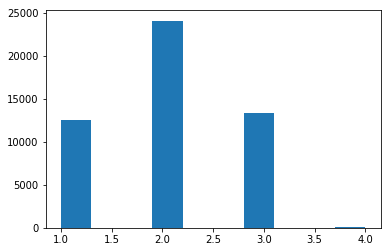

In [254]:
plt.hist(regiondf.n_type)

In [255]:
len(regiondf)

50000

In [256]:
len(regiondf[regiondf.n_type > 1])

37419

In [257]:
len(regiondf[regiondf.n_type < 2])/50000

0.25162

In [263]:
name2par = defaultdict(list)

for rid in region2heads:
    nlist = region2heads[rid]
    for (x,y) in itertools.product(nlist, repeat=2):
        if y != x and y != '<NONE>':
            name2par[x].append(y)

In [264]:
namecount = Counter(names0)

In [265]:
namecount.most_common(50)

[('guy', 10153),
 ('man', 9888),
 ('person', 6864),
 ('<NONE>', 6597),
 ('woman', 5907),
 ('girl', 5482),
 ('shirt', 3757),
 ('elephant', 2441),
 ('chair', 2406),
 ('zebra', 2283),
 ('kid', 2251),
 ('lady', 2250),
 ('giraffe', 1917),
 ('boy', 1893),
 ('horse', 1847),
 ('bear', 1634),
 ('bus', 1463),
 ('cow', 1434),
 ('car', 1372),
 ('bike', 1338),
 ('player', 1305),
 ('pizza', 1270),
 ('dog', 1156),
 ('donut', 1149),
 ('batter', 1118),
 ('bowl', 1077),
 ('couch', 1053),
 ('sheep', 1031),
 ('catcher', 964),
 ('cat', 959),
 ('glass', 955),
 ('sandwich', 917),
 ('dude', 839),
 ('boat', 837),
 ('umbrella', 832),
 ('train', 783),
 ('truck', 760),
 ('baby', 758),
 ('standing', 731),
 ('vase', 681),
 ('table', 680),
 ('animal', 654),
 ('banana', 639),
 ('orange', 629),
 ('piece', 618),
 ('head', 613),
 ('hand', 613),
 ('slice', 612),
 ('bed', 601),
 ('suitcase', 562)]

In [359]:
for n,freq in namecount.most_common(20):
    par = Counter(name2par[n]).most_common(10)
    print(n,[a for (a,b) in par])

guy ['man', 'person', 'shirt', 'dude', 'player', 'boy', 'standing', 'kid', 'jacket', 'skier']
man ['guy', 'person', 'shirt', 'dude', 'player', 'standing', 'jacket', 'boy', 'groom', 'dad']
person ['guy', 'man', 'woman', 'girl', 'shirt', 'lady', 'kid', 'boy', 'player', 'dude']
<NONE> ['guy', 'man', 'person', 'girl', 'woman', 'shirt', 'zebra', 'giraffe', 'elephant', 'bear']
woman ['girl', 'lady', 'person', 'shirt', 'women', 'mom', 'standing', 'chick', 'player', 'dress']
girl ['woman', 'person', 'lady', 'shirt', 'kid', 'child', 'player', 'chick', 'standing', 'dress']
shirt ['guy', 'man', 'person', 'girl', 'woman', 'boy', 'kid', 'lady', 'player', 'dude']
elephant ['baby', 'butt', 'animal', 'trunk', 'head', 'standing', 'elephants', 'elefant', 'face', 'one']
chair ['couch', 'seat', 'bench', 'sofa', 'thing', 'part', 'area', 'recliner', 'char', 'back']
zebra ['zeb', 'zbra', 'butt', 'giraffe', 'head', 'baby', 'animal', 'horse', 'zebras', 'standing']
kid ['boy', 'girl', 'child', 'person', 'shirt'

In [212]:
bbdf = pd.read_json("../data/mscoco_bbdf.json.gz",compression='gzip', orient='split')

In [213]:
bbdf.head()

,i_corpus,image_id,region_id,bb,cat
0,1,480023,86,"[116.95, 305.86, 285.3, 266.03]",58
1,1,480023,438029,"[75.23, 134.7, 203.17, 215.63]",1
2,1,480023,460329,"[239.33, 176.98, 110.56, 133.66]",1
3,1,480023,498741,"[394.95, 222.7, 85.05, 197.48]",1
4,1,480023,1200708,"[0.0, 0.18, 78.96, 164.01]",1


In [268]:
region2cat= {}
for ix,row in bbdf.iterrows():
    region2cat[row['region_id']] = row['cat']

In [269]:
cat2names = defaultdict(list)
for region in region2heads:
    c = region2cat[region]
    cat2names[c] += region2heads[region]

In [357]:
for c in sorted(cat2names.keys()):
    this_names = Counter(cat2names[c]).most_common(10)
    print(c, ", ".join([a for (a,b) in this_names]) )

1 guy, man, person, woman, girl, shirt, <NONE>, lady, kid, boy
2 bike, bicycle, wheel, tire, <NONE>, seat, area, handlebars, thing, spokes
3 car, van, truck, <NONE>, suv, vehicle, taxi, cab, silver, part
4 bike, motorcycle, <NONE>, cycle, scooter, moto, tire, motorcyle, wheel, motocycle
5 plane, airplane, jet, <NONE>, wing, tail, plan, thing, aircraft, plain
6 bus, <NONE>, truck, vehicle, decker, buss, van, train, car, thing
7 train, <NONE>, car, bus, cars, engine, thing, window, trains, tram
8 truck, car, <NONE>, van, vehicle, bus, trailer, semi, ambulance, firetruck
9 boat, <NONE>, ship, sailboat, canoe, thing, row, second, sail, object
10 light, <NONE>, lights, sign, signal, stoplight, traffic, box, walk, thing
11 hydrant, <NONE>, bees, bunch, nozzle, hydor, dick, hydrate, metal, pipe
13 sign, <NONE>, stop
14 meter, <NONE>, metor, thing, parking, part, box, machine, p, metter
15 bench, chair, seat, table, <NONE>, part, area, object, bleachers, thing
16 bird, duck, <NONE>, chicken, g

In [274]:
sperson = wn.synsets('person')

In [276]:
dir(sperson[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_hypernyms',
 '_definition',
 '_examples',
 '_frame_ids',
 '_hypernyms',
 '_instance_hypernyms',
 '_iter_hypernym_lists',
 '_lemma_names',
 '_lemma_pointers',
 '_lemmas',
 '_lexname',
 '_max_depth',
 '_min_depth',
 '_name',
 '_needs_root',
 '_offset',
 '_pointers',
 '_pos',
 '_related',
 '_shortest_hypernym_paths',
 '_wordnet_corpus_reader',
 'also_sees',
 'attributes',
 'causes',
 'closure',
 'common_hypernyms',
 'definition',
 'entailments',
 'examples',
 'frame_ids',
 'hypernym_distances',
 'hypernym_paths',
 'hypernyms',
 'hyponyms',
 'instance_hypernyms',
 'instance_hyponyms',
 'jcn

In [282]:
sperson[0].definition()

'a human being'

In [283]:
sperson[0].hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('causal_agent.n.01'),
  Synset('person.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('person.n.01')]]

In [284]:
sperson[0].hypernym_distances()

{(Synset('causal_agent.n.01'), 1),
 (Synset('entity.n.01'), 3),
 (Synset('entity.n.01'), 6),
 (Synset('living_thing.n.01'), 2),
 (Synset('object.n.01'), 4),
 (Synset('organism.n.01'), 1),
 (Synset('person.n.01'), 0),
 (Synset('physical_entity.n.01'), 2),
 (Synset('physical_entity.n.01'), 5),
 (Synset('whole.n.02'), 3)}

In [286]:
sperson[0].part_meronyms()

[Synset('human_body.n.01'), Synset('personality.n.01')]

In [295]:
sperson[0].hyponyms()

[Synset('abator.n.01'),
 Synset('abjurer.n.01'),
 Synset('abomination.n.01'),
 Synset('abstainer.n.02'),
 Synset('achiever.n.01'),
 Synset('acquaintance.n.03'),
 Synset('acquirer.n.01'),
 Synset('active.n.03'),
 Synset('actor.n.02'),
 Synset('adjudicator.n.01'),
 Synset('admirer.n.02'),
 Synset('adoptee.n.01'),
 Synset('adult.n.01'),
 Synset('adventurer.n.01'),
 Synset('adversary.n.01'),
 Synset('advisee.n.01'),
 Synset('advocate.n.01'),
 Synset('affiant.n.01'),
 Synset('african.n.01'),
 Synset('agnostic.n.01'),
 Synset('amateur.n.01'),
 Synset('amerindian.n.01'),
 Synset('ancient.n.02'),
 Synset('anomaly.n.02'),
 Synset('anti-american.n.01'),
 Synset('anti.n.01'),
 Synset('applicant.n.01'),
 Synset('appointee.n.02'),
 Synset('appreciator.n.01'),
 Synset('apprehender.n.02'),
 Synset('aquarius.n.01'),
 Synset('archaist.n.01'),
 Synset('aries.n.01'),
 Synset('arrogator.n.01'),
 Synset('assessee.n.01'),
 Synset('asthmatic.n.01'),
 Synset('authority.n.02'),
 Synset('autodidact.n.01'),
 Syn

In [298]:
sperson[0].lemma_names()

['person', 'individual', 'someone', 'somebody', 'mortal', 'soul']

In [300]:
wn.synset('female.n.02').lemma_names()

['female', 'female_person']

In [302]:
wn.synset('man.n.03').lemma_names()

['man']

In [304]:
wn.synset('guy.n.01').hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('causal_agent.n.01'),
  Synset('person.n.01'),
  Synset('adult.n.01'),
  Synset('man.n.01'),
  Synset('guy.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('person.n.01'),
  Synset('adult.n.01'),
  Synset('man.n.01'),
  Synset('guy.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('causal_agent.n.01'),
  Synset('person.n.01'),
  Synset('male.n.02'),
  Synset('man.n.01'),
  Synset('guy.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('person.n.01'),
  Synset('male.n.02'),
  Synset('man.n.01'),
  Synset('guy.n.01')]]

In [308]:
wn.synset('lady.n.03').hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('causal_agent.n.01'),
  Synset('person.n.01'),
  Synset('leader.n.01'),
  Synset('aristocrat.n.01'),
  Synset('female_aristocrat.n.01'),
  Synset('lady.n.03')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('living_thing.n.01'),
  Synset('organism.n.01'),
  Synset('person.n.01'),
  Synset('leader.n.01'),
  Synset('aristocrat.n.01'),
  Synset('female_aristocrat.n.01'),
  Synset('lady.n.03')]]

In [311]:
wn.synset('scooter.n.03').hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('container.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('motor_scooter.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('conveyance.n.03'),
  Synset('vehicle.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('motor_scooter.n.01')]]

In [313]:
wn.synset('motorcycle.n.01').hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('container.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('motorcycle.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('conveyance.n.03'),
  Synset('vehicle.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('motorcycle.n.01')]]

In [314]:
wn.synset('motorcycle.n.01').lemma_names()

['motorcycle', 'bike']

In [315]:
wn.synset('motor_vehicle.n.01').lemma_names()

['motor_vehicle', 'automotive_vehicle']

In [319]:
wn.synset('vehicle.n.01').lemma_names()

['vehicle']

In [333]:
wn.synset('frisbee.n.01').hyponyms()

[]

In [340]:
wn.synset('bullet_train.n.01').hyponyms()

[]

In [341]:
wn.synset('bullet_train.n.01').definition()

'a high-speed passenger train'

In [342]:
wn.synset('passenger_train.n.01').definition()

'a train that carries passengers'

In [345]:
wn.synset('airplane.n.01').lemma_names()

['airplane', 'aeroplane', 'plane']

In [354]:
wn.synset('sandwich.n.01').hyponyms()

[Synset('bacon-lettuce-tomato_sandwich.n.01'),
 Synset('bomber.n.03'),
 Synset('butty.n.01'),
 Synset('chicken_sandwich.n.01'),
 Synset('club_sandwich.n.01'),
 Synset('gyro.n.01'),
 Synset('ham_sandwich.n.01'),
 Synset('hamburger.n.01'),
 Synset('hotdog.n.02'),
 Synset('open-face_sandwich.n.01'),
 Synset('reuben.n.02'),
 Synset('sloppy_joe.n.01'),
 Synset('tunaburger.n.01'),
 Synset('western.n.02'),
 Synset('wrap.n.02')]